In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train','/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test','/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
NUM_CLASS = 65
SEED = 43
LABEL_NAMES = [i for i in range(NUM_CLASS)]
IMAGE_SIZE = (250,250)
BATCH_SIZE = 512   # modify batch size for best results
EPOCHS = 50   # modify epochs for best results

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train= tf.keras.utils.image_dataset_from_directory(
datasets[0],
validation_split=0.25,
color_mode='grayscale',
label_mode="categorical",
subset="training",
shuffle=True,
seed=SEED,
image_size=IMAGE_SIZE,
batch_size=BATCH_SIZE)

validation= tf.keras.utils.image_dataset_from_directory(
datasets[0],
validation_split=0.25,
label_mode="categorical",
color_mode='grayscale',
subset="validation",
shuffle=True,
seed=SEED,
image_size=IMAGE_SIZE,
batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 31920 files for training.
Found 42559 files belonging to 65 classes.
Using 10639 files for validation.


In [5]:
model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(NUM_CLASS, activation=tf.nn.softmax)])

model.build(input_shape=(None, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.compile(
optimizer= Adam(learning_rate= 0.001),
loss= 'categorical_crossentropy', metrics=['accuracy'])
mymodel= model.fit(train, validation_data=validation, epochs=EPOCHS)

Epoch 1/50
63/63 [==============================] - 95s 1s/step - loss: 4.4736 - accuracy: 0.0184 - val_loss: 4.1794 - val_accuracy: 0.0397
Epoch 2/50
63/63 [==============================] - 57s 881ms/step - loss: 3.7426 - accuracy: 0.1003 - val_loss: 3.1753 - val_accuracy: 0.1930
Epoch 3/50
63/63 [==============================] - 57s 873ms/step - loss: 2.8443 - accuracy: 0.2686 - val_loss: 2.3389 - val_accuracy: 0.3743
Epoch 4/50
63/63 [==============================] - 58s 882ms/step - loss: 1.8521 - accuracy: 0.4968 - val_loss: 1.4933 - val_accuracy: 0.5988
Epoch 5/50
63/63 [==============================] - 58s 877ms/step - loss: 1.2991 - accuracy: 0.6574 - val_loss: 1.1389 - val_accuracy: 0.7056
Epoch 6/50
63/63 [==============================] - 57s 880ms/step - loss: 1.0386 - accuracy: 0.7353 - val_loss: 1.1855 - val_accuracy: 0.6901
Epoch 7/50
63/63 [==============================] - 58s 888ms/step - loss: 1.0113 - accuracy: 0.7463 - val_loss: 0.8947 - val_accuracy: 0.7886
Ep

In [6]:
test= tf.keras.utils.image_dataset_from_directory(
datasets[1],
labels=None,
label_mode="categorical",
color_mode='grayscale',
shuffle=False,
image_size=IMAGE_SIZE,
batch_size=BATCH_SIZE)

Found 10640 files belonging to 1 classes.


In [7]:
predictions= model.predict(test)
labels= sorted(os.listdir(datasets[0]))
mylist= os.listdir(datasets[1])

mydata_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))
predictions_mod = np.argmax(predictions, 1)

for idx,image in enumerate(sorted(mylist)):
    df = pd.DataFrame([[int(image.split(".")[0]), int(labels[predictions_mod[idx]])]], columns=['ID','Label'])
    mydata_predictions = pd.concat([mydata_predictions, df])
    
mydata_predictions.to_csv('predictions.csv', index=False, header=True) 

21/21 [==============================] - 17s 790ms/step


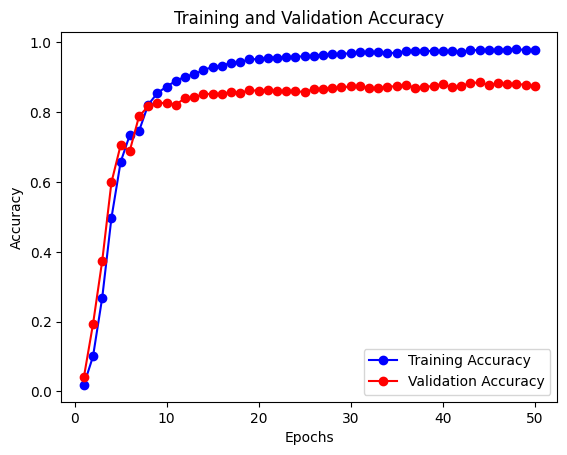

In [8]:
import matplotlib.pyplot as plt

# Access the accuracy values from the training history
train_accuracy = mymodel.history['accuracy']
val_accuracy = mymodel.history['val_accuracy']

# Plotting the accuracy curve
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plot
plt.show()

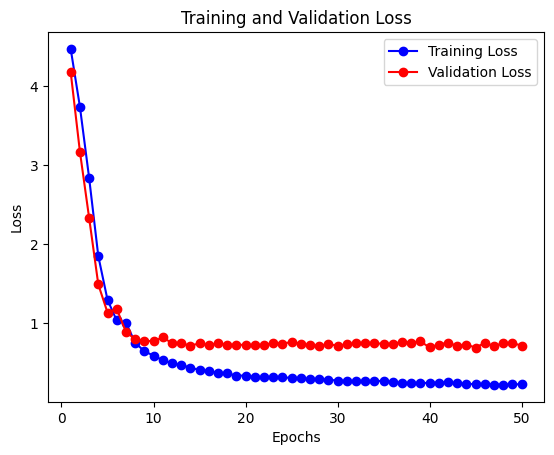

In [9]:
# Access the loss values from the training history
train_loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']

# Plotting the loss curve
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()